In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,models,layers

In [4]:
(training_images, training_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
training_images=training_images.reshape(60000, 28, 28, 1)
test_images=test_images.reshape(10000, 28, 28, 1)

In [6]:
training_images, test_images = training_images / 255.0, test_images /255.0

In [7]:
from keras.layers.attention.multi_head_attention import activation
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),

])

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[ 'accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [10]:
history =model.fit(training_images, training_labels, epochs=5,
                   validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 111s 59ms/step - loss: 0.4325 - accuracy: 0.8439 - val_loss: 0.3415 - val_accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 166s 89ms/step - loss: 0.2904 - accuracy: 0.8937 - val_loss: 0.2921 - val_accuracy: 0.8938
Epoch 3/5
1875/1875 [==============================] - 108s 57ms/step - loss: 0.2452 - accuracy: 0.9096 - val_loss: 0.2876 - val_accuracy: 0.8951
Epoch 4/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.2127 - accuracy: 0.9209 - val_loss: 0.2477 - val_accuracy: 0.9115
Epoch 5/5
1875/1875 [==============================] - 106s 57ms/step - loss: 0.1861 - accuracy: 0.9299 - val_loss: 0.2573 - val_accuracy: 0.9072


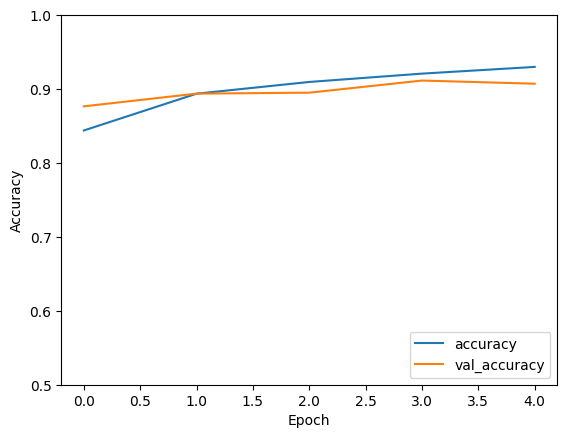

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')